#Notebook para uso de R con Python

## Instalación

In [ ]:
!pip install rpy2==3.5.1

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [ ]:
import rpy2
print(rpy2.__version__)

3.5.1


## Librerias rpy2

In [ ]:
#import boto3
import pickle
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
import scipy.stats

### R en python

In [ ]:
import rpy2.robjects as ro
import rpy2.robjects.packages as rpacks
from rpy2.robjects.packages import importr

###Pandas

In [ ]:
import pandas as pd

#### Pandas a R

In [ ]:
# Cargar bibliotecas necesarias
from rpy2.robjects import pandas2ri

#### R a Pandas

In [ ]:
# Cargar bibliotecas necesarias
from rpy2.robjects import pandas2ri

### Numpy

In [ ]:
import numpy as np

#### Numpy a **R**

In [ ]:
# Cargar bibliotecas necesarias
import rpy2.robjects.numpy2ri as numpy2rpy

#### R a Numpy

In [ ]:
# Cargar bibliotecas necesarias
from rpy2.robjects import numpy2ri

## Leer dataset

In [ ]:
utils = importr('utils')

In [ ]:
utils.install_packages('readr')

(as ‘lib’ is unspecified)







	‘/tmp/RtmpE1gfbz/downloaded_packages’



<rpy2.rinterface_lib.sexp.NULLType object at 0x7f4fea1b71c0> [RTYPES.NILSXP]

In [ ]:
readr = importr('readr')

In [ ]:
%load_ext rpy2.ipython

In [ ]:
%%R
write.csv(quakes,file="quakes.csv" )

In [ ]:
#Boto3 codigo para leer dataset de S3

## Analisis Exploratorio 

In [ ]:
quakes=pd.read_csv("quakes.csv")

In [ ]:
quakes.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  1000 non-null   int64  
 1   lat         1000 non-null   float64
 2   long        1000 non-null   float64
 3   depth       1000 non-null   int64  
 4   mag         1000 non-null   float64
 5   stations    1000 non-null   int64  
dtypes: float64(3), int64(3)
memory usage: 47.0 KB


In [ ]:
quakes = quakes.drop('Unnamed: 0',axis=1)

In [ ]:
q_mean = quakes['mag'].mean()
print(q_mean)

4.6204


In [ ]:
q_sd = quakes['mag'].std()
print(q_sd)

0.4027729708732527


In [ ]:
quakes.describe()

,lat,long,depth,mag,stations
count,1000.000000,1000.000000,1000.000000,1000.000000,1000.000000
mean,-20.642750,179.462020,311.371000,4.620400,33.418000
std,5.028791,6.069497,215.535498,0.402773,21.900386
min,-38.590000,165.670000,40.000000,4.000000,10.000000
25%,-23.470000,179.620000,99.000000,4.300000,18.000000
50%,-20.300000,181.410000,247.000000,4.600000,27.000000
75%,-17.637500,183.200000,543.000000,4.900000,42.000000
max,-10.720000,188.130000,680.000000,6.400000,132.000000


In [ ]:
quakes.head()

,lat,long,depth,mag,stations
0,-20.42,181.62,562,4.8,41
1,-20.62,181.03,650,4.2,15
2,-26.00,184.10,42,5.4,43
3,-17.97,181.66,626,4.1,19
4,-20.42,181.96,649,4.0,11


<Axes: xlabel='mag', ylabel='count'>

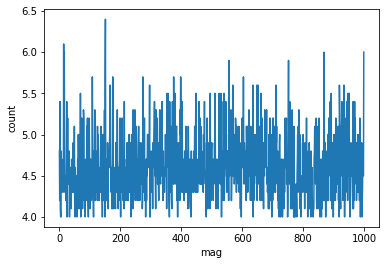

In [ ]:
quakes.mag.plot(xlabel='mag', ylabel='count')

<Axes: xlabel='mag', ylabel='count'>

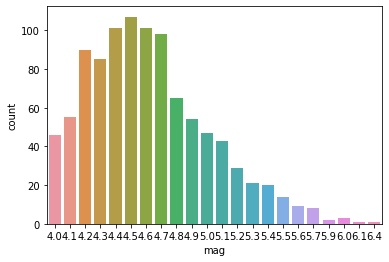

In [ ]:
sns.countplot(data=quakes, x='mag')

In [ ]:
mag_q = quakes.mag

In [ ]:
quakes.mag.unique()

array([4.8, 4.2, 5.4, 4.1, 4. , 4.4, 4.7, 4.3, 4.6, 6.1, 6. , 4.5, 5.2,
       4.9, 5.1, 5. , 5.5, 5.3, 5.7, 6.4, 5.6, 5.9])

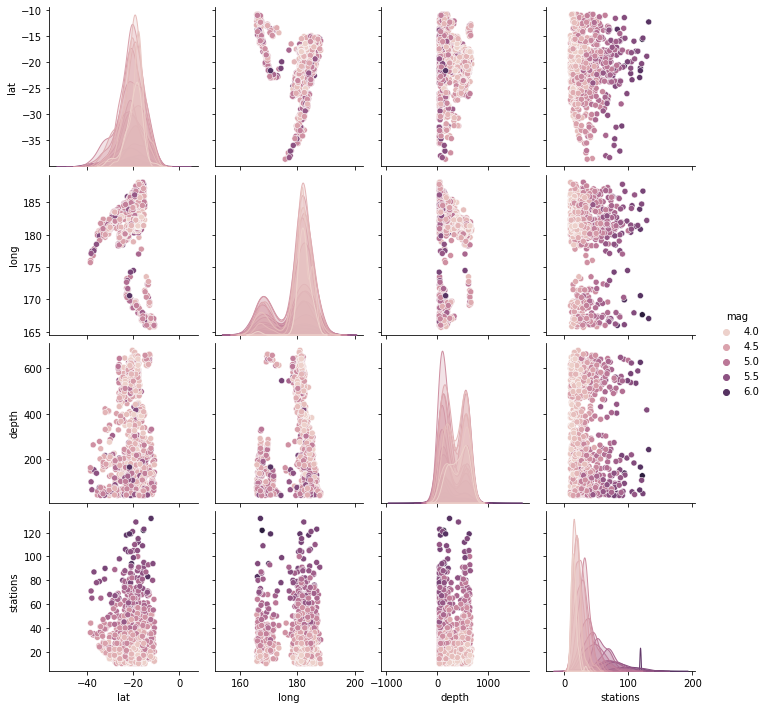

In [ ]:
sns.pairplot(quakes, hue='mag',vars=['lat','long','depth','stations'])

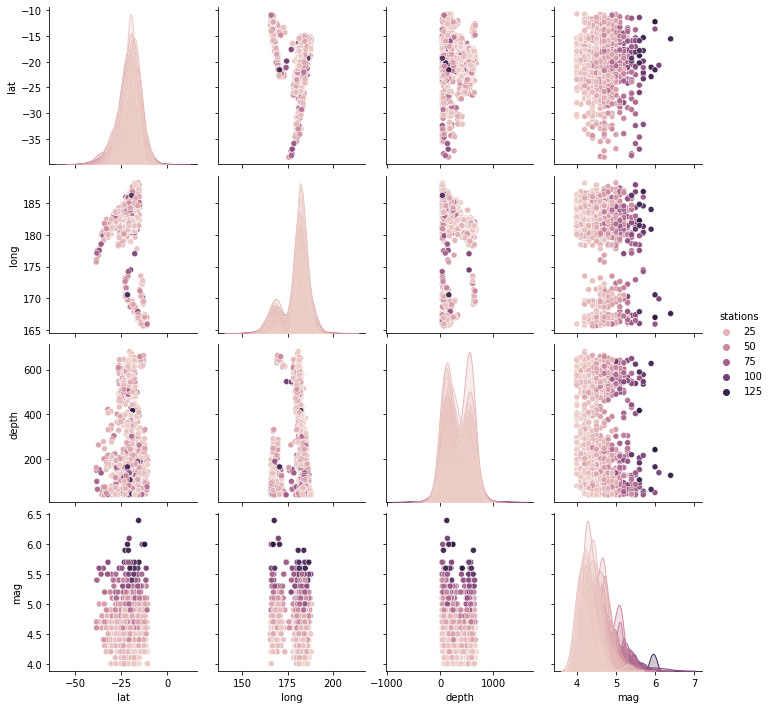

In [ ]:
sns.pairplot(quakes, hue='stations',vars=['lat','long','depth','mag'])

<Axes: >

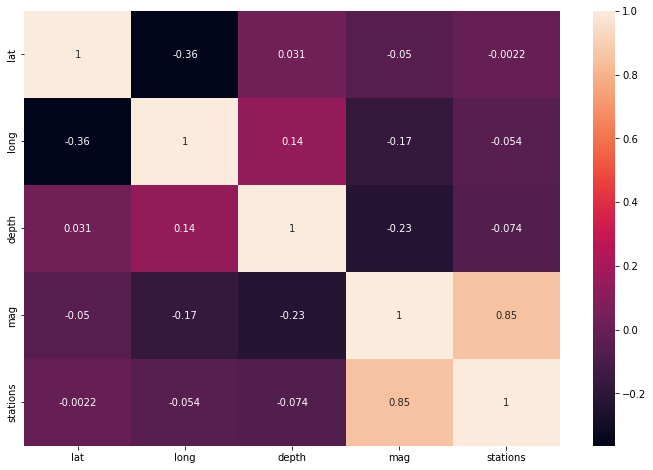

In [ ]:
plt.figure(figsize=(12,8))
sns.heatmap(quakes.corr(),annot=True)

## Ingestar

### Librerias

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split

Definicion de variables

In [ ]:
# Definicion de valores
target_val = "mag"
dataset_name = "quakes.csv"
dataset_name_01 = "train.csv"

### Funciones comunes

In [ ]:
# Salvar el dataset
def save_data(set_name,dataset):
  dataset.to_csv(set_name + ".csv", index=False, columns=['lat','long','depth','stations','mag'])
  print("Dataset "+ set_name +".csv listo ...")

In [ ]:
# Junta los datos en un dataset
def fix_data(A,B,dataset):
  ds= pd.DataFrame(data = A)
  ds[target_val]=B
  print(ds.head(5))
  save_data(dataset,ds)

### Funcion de ingesta

In [ ]:
# Dividir datos en 3 datasets
def split_data(dataframe_name, validation=False, ss=0.1):
  df = pd.read_csv(dataframe_name)
  X = df.drop(target_val,axis=1) 
  y = df[target_val]
  X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=ss, random_state=42)
  if validation == False: 
    setname_01='train'
    setname_02='test'
  else :
    setname_01='train'
    setname_02='validate'
  fix_data(X_train,y_train,setname_01)
  fix_data(X_test,y_test,setname_02)

### Programa principal

In [ ]:
# llamada de funciones
split_data(dataset_name, validation = False, ss = 0.2)
split_data(dataset_name_01, validation = True, ss = 0.1)

     Unnamed: 0    lat    long  depth  stations  mag
29           30 -19.84  182.37    328        17  4.4
535         536 -16.10  167.25     68        36  4.7
695         696 -23.90  179.90    579        16  4.4
557         558 -22.91  183.95     64       118  5.9
836         837 -17.38  168.63    209        29  4.7
Dataset train.csv listo ...
     Unnamed: 0    lat    long  depth  stations  mag
521         522 -19.22  182.54    570        22  4.1
737         738 -25.14  178.42    554        15  4.1
740         741 -20.63  181.61    599        30  4.6
660         661 -30.01  180.80    286        43  4.8
411         412 -22.24  184.56     99        57  4.8
Dataset test.csv listo ...
       lat    long  depth  stations  mag
428 -20.83  181.01    622        15  4.3
137 -19.61  181.91    590        34  4.6
72  -32.14  180.00    331        27  4.5
77  -21.24  180.86    615        23  4.9
512 -21.54  185.48     51        29  5.0
Dataset train.csv listo ...
       lat    long  depth  stations

## Entrenar

### Librerias

In [ ]:
import pandas as pd
import pickle
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from scipy.stats import f

Definir variables globales

In [ ]:
# Definicion de valores
target_val = "mag"
ds_train = "quakes.csv"
ds_validate = "validate.csv"

### Funciones comunes

In [ ]:
# Desplegar metircas de accuracy, confusion_matix, f1_score
def data_metrics(yP, yL):
  # predicting the accuracy score
  score=r2_score(yL,yP)
  print('r2 socre is ',score)
  print('mean_sqrd_error is==',mean_squared_error(yL,yP))
  print('root_mean_squared error of is==',np.sqrt(mean_squared_error(yL,yP)))

In [ ]:
# Desplegar metircas de pesos, intercepcion, r cuadrada
def data_metrics_2(X_01, y_01, modelo):
  m_weights=modelo.coef_
  r_2 =modelo.score(X_01, y_01)
  print(f"pesos: {m_weights}")
  print("intercept {}".format(modelo.intercept_))
  print(f"r2 = {r_2}")
  return r_2

In [ ]:
# Separar datos en features y target
def split_data(dataframe_name):
  df = pd.read_csv(dataframe_name)
  X_01 = df.drop(target_val,axis=1) 
  y_01 = df[target_val]
  return (X_01,y_01)

In [ ]:
# persistir al modelo
def data_WR(model,up=False,filename='mlparams'):
  pickle.dump(model, open(filename, 'wb'))
  if up==False:
    print('Parametros escritos en archivo mlparams')
  else:
    print('Parametros actualizados en archivo mlparams')

In [ ]:
# pedecir con el modelo
def data_prediction(model, X_01):
  y_01 = model.predict(X_01)
  return y_01

### Entrenamiento

In [ ]:
#Funcion de Entrenamineto
def training(train_name):
  (X,y)=split_data(train_name)
  reg_train = LinearRegression().fit(X,y)
  print('Metricas Entrenamiento')

  r_2_train = data_metrics_2(X, y, reg_train)
  #F = hipotesisi_r2(r_2_train,y.count())
  
  quakes_weights=reg_train.coef_
  y_pred = data_prediction(reg_train, X.iloc[1:10]) 
  print("comprobar con un dato si se cumple b0 + w0*x0 + w1*x1 + w2*x2 + w3*x3")
  print(reg_train.intercept_+X.iloc[9].lat*quakes_weights[0]+X.iloc[9].long*quakes_weights[1] + X.iloc[9].depth*quakes_weights[2]+X.iloc[9].stations*quakes_weights[3])

  y_quakes_estimation = data_prediction(reg_train, X) 
  print(y_quakes_estimation[0:5])
  
  #data_metrics (y_quakes_estimation,y)
  data_WR(reg_train,False)
  return r_2_train

### Validacion

####funcion

In [ ]:
#funcion de validacion
def validation(val_name, filename='mlparams'):
  reg_train = pickle.load(open(filename, 'rb'))
  (X,y)=split_data(val_name)
  reg_validate = reg_train.fit(X, y)
  print('Metricas Validación')
  r_2_validation = data_metrics_2(X, y, reg_validate)
  #F = hipotesisi_r2(r_2_validation,y.count())
  y_pred = data_prediction(reg_validate, X)
  #data_metrics (y_pred,y)
  data_WR(reg_validate,True)
  return r_2_validation

#### correlacion

In [ ]:
# Validacion de correlacion R
def corr_validate_2(val_name):

  # Importar la librería stats de R
  stats = rpacks.importr('stats')

  # Importar los datos en R
  ro.r('datos_r <- read.csv("validate.csv")')

  # Calcular las correlaciones
  cor_mag_lat = stats.cor_test(ro.r('datos_r$mag'), ro.r('datos_r$lat'), method='pearson')
  cor_mag_long = stats.cor_test(ro.r('datos_r$mag'), ro.r('datos_r$long'), method='pearson')
  cor_mag_depth = stats.cor_test(ro.r('datos_r$mag'), ro.r('datos_r$depth'), method='pearson')
  cor_mag_stations = stats.cor_test(ro.r('datos_r$mag'), ro.r('datos_r$stations'), method='pearson')

  # Obtener los resultados de las correlaciones
  print('mag_lat')
  coef_corr_mag_lat = cor_mag_lat.rx2('estimate')[0]
  p_valor_mag_lat = cor_mag_lat.rx2('p.value')[0]
  print('Coeficiente de correlación:', coef_corr_mag_lat)
  print('P-valor:', p_valor_mag_lat)

  print('mag_long')
  coef_corr_mag_long = cor_mag_long.rx2('estimate')[0]
  p_valor_mag_long = cor_mag_long.rx2('p.value')[0]
  print('Coeficiente de correlación:', coef_corr_mag_long)
  print('P-valor:', p_valor_mag_long)

  print('mag_depth')
  coef_corr_mag_depth = cor_mag_depth.rx2('estimate')[0]
  p_valor_mag_depth = cor_mag_depth.rx2('p.value')[0]
  print('Coeficiente de correlación:', coef_corr_mag_depth)
  print('P-valor:', p_valor_mag_depth)

  print('mag_stations')
  coef_corr_mag_stations = cor_mag_stations.rx2('estimate')[0]
  p_valor_mag_stations = cor_mag_stations.rx2('p.value')[0]
  print('Coeficiente de correlación:', coef_corr_mag_stations)
  print('P-valor:', p_valor_mag_stations)

#### Prueba hipoteisis

H0 = mayor o igual que (≥) 	
Ha = menor que (<)

$F=\frac{R^2/k}{(1-R^2)/(n-(k+1))}$

In [ ]:
# r2 hipotesis
def hipotesisi_r2(r_2):
  n=1000
  k=4
  a = 0.01
  v2=(n-(k+1))
  F_a = f.isf(a, k, v2)
  F = (r_2 / k) / ((1-r_2)/v2)
  #Zona de rechazo
  if F>F_a == True: print('En zona de rechazo') 
  else: print('No se rechaza')
  

### Programa Principal

In [ ]:
r_train = training(ds_train)   
r_val = validation(ds_validate)
#corr_validate_2(ds_validate)
hipotesisi_r2(r_train)


Metricas Entrenamiento
pesos: [-8.09742387e-05 -7.61733526e-03 -9.27645025e-03 -2.79088008e-04
  1.54095052e-02]
intercept 5.740400427259968
r2 = 0.7751823954576219
comprobar con un dato si se cumple b0 + w0*x0 + w1*x1 + w2*x2 + w3*x3
-1.4014369178266977
[4.6860188  4.26772752 4.88130076 4.3098716  4.19597509]
Parametros escritos en archivo mlparams
Metricas Validación
pesos: [-0.00587362 -0.00516482 -0.00037963  0.01497489]
intercept 5.02901019731391
r2 = 0.710851912185434
Parametros actualizados en archivo mlparams
No se rechaza


## Validar

#### librerias

In [ ]:
import pandas as pd
import pickle
from sklearn.linear_model import LinearRegression

In [ ]:
target_val = "mag"
ds_test = "test.csv"

#### Funciones comunes

In [ ]:
# Desplegar metircas de pesos, intercepcion, r cuadrada
def data_metrics_2(X_01, y_01, modelo):
  m_weights=modelo.coef_
  r_2 =modelo.score(X_01, y_01)
  print(f"pesos: {m_weights}")
  print("intercept {}".format(modelo.intercept_))
  print(f"r2 = {r_2}")
  return r_2


In [ ]:
# Separar datos en features y target
def split_data(dataframe_name):
  df = pd.read_csv(dataframe_name)
  X_01 = df.drop(target_val,axis=1) 
  y_01 = df[target_val]
  return (X_01,y_01)


In [ ]:
# pedecir con el modelo
def data_prediction(model, X_01):
  y_01 = model.predict(X_01)
  return y_01

#### funcion

In [ ]:
#funcion de validacion
def test(test_name, filename='mlparams'):
  reg_test = pickle.load(open(filename, 'rb'))
  (X,y)=split_data(test_name)
  y_pred = data_prediction(reg_test, X)
  print('Metricas Validación')
  data_metrics_2(X, y, reg_test)

#### Programa principal

In [ ]:
test(ds_test)

Metricas Validación
pesos: [-0.00587362 -0.00516482 -0.00037963  0.01497489]
intercept 5.02901019731391
r2 = 0.7490924236896079


## Inferir

#### librerias

In [ ]:
from flask import Flask
from flask import request
from sklearn.linear_model import LogisticRegression
import pickle
import logging
import sys
import numpy as np

#### Codigo

In [ ]:
filename = "mlparams"
api_mlparams = pickle.load(open(filename, 'rb'))

In [ ]:
print(__name__)
app = Flask(__name__)

filename = "mlparams"
api_mlparams = pickle.load(open(filename, 'rb'))

logging.info(api_mlparams)

@app.route('/infer')
def infer():  
    reqX_1 = request.args.get('x_1')
    reqX_2 = request.args.get('x_2')
    reqX_3 = request.args.get('x_3')
    reqX_4 = request.args.get('x_4')
    x_1 = float(reqX_1)
    x_2 = float(reqX_2)
    x_3 = float(reqX_3)
    x_4 = float(reqX_4)
    print((x_1,type(x_1)),file=sys.stderr)
    print((x_2,type(x_2)),file=sys.stderr)
    print((x_3,type(x_3)),file=sys.stderr)
    print((x_4,type(x_4)),file=sys.stderr)
    X_in = np.ndarray(shape=(1,4),buffer=np.array([x_1, x_2, x_3, x_4]) )
    return {'y':api_mlparams.predict(X_in).item()}

if __name__ == '__main__':
    app.run(host='0.0.0.0',debug=False)

__main__
 * Serving Flask app '__main__'
 * Debug mode: off


INFO:werkzeug:WARNING: This is a development server. Do not use it in a production deployment. Use a production WSGI server instead.
 * Running on all addresses (0.0.0.0)
 * Running on http://127.0.0.1:5000
 * Running on http://172.28.0.12:5000
INFO:werkzeug:Press CTRL+C to quit


In [ ]:
def infer(inputs):
  W = api_mlparams.coef_
  b = api_mlparams.intercept_

  X_in=np.ndarray(shape=(1,4),buffer=np.array(inputs) )
  print("W",W)
  print("b",b)
  print("X_in",X_in)
  return {'y':X_in@W  + b}

In [ ]:
infer([-15.90,	185.30,	57,	19])

W [-0.00587362 -0.00516482 -0.00037963  0.01497489]
b 5.02901019731391
X_in [[-15.9 185.3  57.   19. ]]


{'y': array([4.42824286])}